<a href="https://colab.research.google.com/github/Nazneen-akram/NED-Data-Science-Artificial-Intelligence/blob/main/chapter03_introduction_to_keras_and_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [44]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [45]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [46]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.2448047]
 [-0.3088444]
 [-0.6336799]], shape=(3, 1), dtype=float32)


In [47]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.19298768]
 [0.9839711 ]
 [0.35881984]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [48]:
import numpy as np
x = np.ones(shape=(2, 2))
x

array([[1., 1.],
       [1., 1.]])

In [49]:
x[0,0]

1.0

**Creating a TensorFlow variable**

In [50]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.8953617 ],
       [-1.044574  ],
       [-0.10312599]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [51]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [52]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [53]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [54]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [55]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
# d(3X^2)/dx = 6
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [56]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)  # manually marking the const as trainable parameter
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using nested gradient tapes to compute second-order gradients**

In [57]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2    # S=0.5*gt^2
    speed = inner_tape.gradient(position, time)
    print(speed)   # v=>dt/ds =>1*gt =>9.8t =>0 as t=0
acceleration = outer_tape.gradient(speed, time)
print(acceleration)  # a=dv/dt =>9.8

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [58]:
num_samples_per_class = 1000
#sample 1 points
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

#sample 2 points
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [59]:
#checking
negative_samples[0], positive_samples[0]

(array([0.55689111, 2.60135257]), array([ 3.03281697, -0.85513951]))

**Stacking the two classes into an array with shape (2000, 2)**

In [60]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [61]:
#checking
inputs[0], inputs[1000]

(array([0.5568911, 2.6013525], dtype=float32),
 array([ 3.032817 , -0.8551395], dtype=float32))

**Generating the corresponding targets (0 and 1)**

In [62]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

targets.shape

(2000, 1)

In [63]:
#checking
targets[:1000].sum(), targets[1000:].sum()

(0.0, 1000.0)

In [64]:
targets[:,0]

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

**Plotting the two point classes**

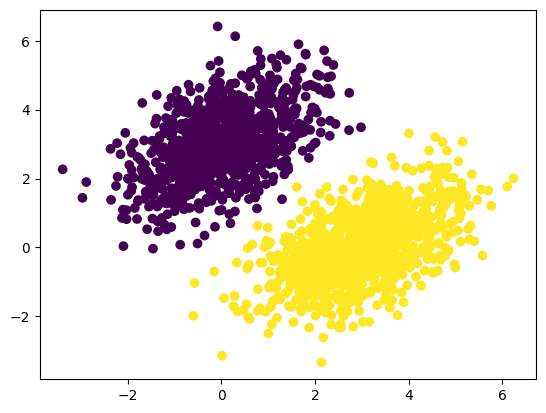

In [65]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [66]:
input_dim = 2  #for wx, wy or w0, w1
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [67]:
def model(inputs):
    return tf.matmul(inputs, W) + b   # [X Y] . [w0]  + b
                                       #        [w1]

**The mean squared error loss function**

In [68]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)  #square of delta loss
    return tf.reduce_mean(per_sample_losses) # mean and then reduce dim, that's a scaler value

**The training step function**

In [69]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets) #MSE Loss
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  #calculate gradients
    W.assign_sub(grad_loss_wrt_W * learning_rate)  #subtract and assign W losses
    b.assign_sub(grad_loss_wrt_b * learning_rate)  #subtract and assign
    return loss

**The batch training loop**

In [70]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.8802
Loss at step 1: 0.5584
Loss at step 2: 0.1938
Loss at step 3: 0.1323
Loss at step 4: 0.1161
Loss at step 5: 0.1071
Loss at step 6: 0.0998
Loss at step 7: 0.0933
Loss at step 8: 0.0873
Loss at step 9: 0.0819
Loss at step 10: 0.0769
Loss at step 11: 0.0724
Loss at step 12: 0.0683
Loss at step 13: 0.0645
Loss at step 14: 0.0611
Loss at step 15: 0.0579
Loss at step 16: 0.0551
Loss at step 17: 0.0525
Loss at step 18: 0.0501
Loss at step 19: 0.0479
Loss at step 20: 0.0459
Loss at step 21: 0.0441
Loss at step 22: 0.0424
Loss at step 23: 0.0409
Loss at step 24: 0.0395
Loss at step 25: 0.0383
Loss at step 26: 0.0371
Loss at step 27: 0.0361
Loss at step 28: 0.0351
Loss at step 29: 0.0343
Loss at step 30: 0.0335
Loss at step 31: 0.0327
Loss at step 32: 0.0321
Loss at step 33: 0.0315
Loss at step 34: 0.0309
Loss at step 35: 0.0304
Loss at step 36: 0.0299
Loss at step 37: 0.0295
Loss at step 38: 0.0291
Loss at step 39: 0.0288


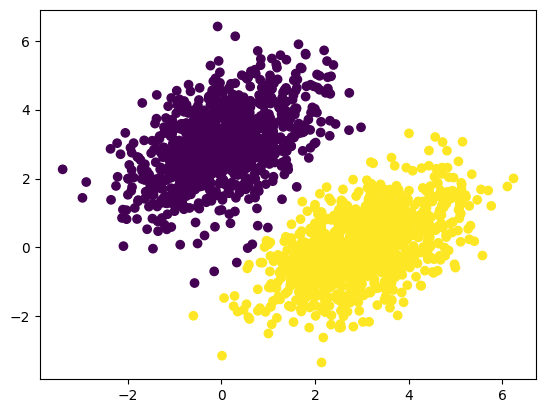

In [71]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

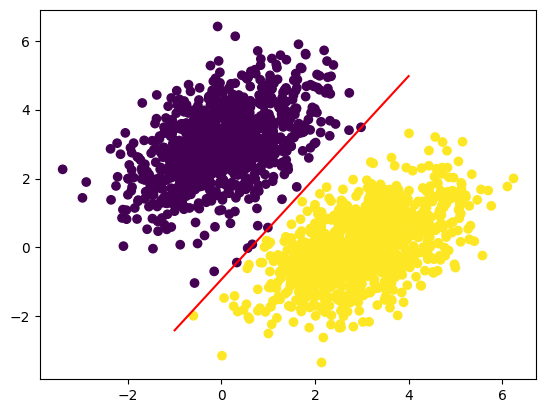

In [72]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

####A Layer is an object that encapsulates some state (weights) and some computation
(a forward pass)

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [73]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

    '''
    def __call__(self, inputs):
        if not self.built:
            self.build(inputs.shape)
            self.built=True
        return self.call(inputs)
    '''

In [74]:
#instantiating one dense layer
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

input_tensor = tf.ones(shape=(2, 784))
#calling layer with defined input
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [75]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [76]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

Can either be instantiated using models.Sequential([]) or keras.Sequential([])

In [77]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [78]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x791920429f90>>

### From layers to models

### The "compile" step: Configuring the learning process

In [79]:
model = keras.Sequential(
    [keras.layers.Dense(1)]
    ) # single input, single layer model

model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

parameters can be passed using keras constants as well, below is preferred way

In [80]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [81]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 6.7606 - binary_accuracy: 0.7785
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 6.4852 - binary_accuracy: 0.7935
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 6.2183 - binary_accuracy: 0.8070
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 5.9687 - binary_accuracy: 0.8220
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 5.7298 - binary_accuracy: 0.8310


In [82]:
history.history

{'loss': [6.760604381561279,
  6.485194206237793,
  6.21829891204834,
  5.968720436096191,
  5.729834079742432],
 'binary_accuracy': [0.7785000205039978,
  0.7935000061988831,
  0.8069999814033508,
  0.8220000267028809,
  0.8309999704360962]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [83]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

#Most efficient way to randomize the inputs by using indices randomization
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# used for train/valid split
num_validation_samples = int(0.3 * len(inputs))

# 30%
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]

# 70%
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

# training loop
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1647 - binary_accuracy: 0.9657 - val_loss: 0.1228 - val_binary_accuracy: 0.9567
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0695 - binary_accuracy: 0.9621 - val_loss: 0.0635 - val_binary_accuracy: 0.9867
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0815 - binary_accuracy: 0.9471 - val_loss: 0.0258 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0705 - binary_accuracy: 0.9657 - val_loss: 0.0445 - val_binary_accuracy: 0.9983
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0698 - binary_accuracy: 0.9643 - val_loss: 0.0256 - val_binary_accuracy: 0.9983


### Inference: Using a model after training

In [84]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[ 0.15765989]
 [ 0.98748434]
 [ 0.16761059]
 [ 0.70811605]
 [ 0.21521717]
 [ 0.2853312 ]
 [ 0.9789071 ]
 [ 0.9189414 ]
 [ 1.0218403 ]
 [-0.00531995]]


## Summary